# Диаметр множества точек(вращающиеся калиперы)

В этом билете мы рассмотрим задачу о нахождении из множества точек $P$ двух самых удаленных друг от друга. 

**Оперделение 1. ** **Диаметром $(d)$** множества точек назовем расстояние между двумя самыми удаленными друг от друга точками. 

**Определение 2. Вращающиеся калиперы** – это несложный паттерн 
проектирования различных алгоритмов, требующих последовательного обхождения выпуклых многоугольников в $\mathbb{R}^2$. Рассмотрим применение метода на нашей задаче.

**Лемма 1.** *Диаметр множества лежит на выпуклой оболочке этого множества*

*Доказательство.* Докажем от противного.  
Пусть мы нашли диаметр множства $d(P)=dist(A,B)$, причем, не теряя общности, $B\not\in CH(P)$. Тогда утверждается, что можно пустить луч $AB$ и посмотреть, в какой точке он пересечет выпуклую оболочку. Легко показать, что как минимум одна точка, формирующая ребро выпуклой оболочки, пересеченное лучем, имеет дистанцию до $A$ больше $d(P)$. Ч.т.д.

<img src="Diam.mn-va-min.ohv.okr/h.png" style="display: inline"/>

Исходя из Леммы 1, диаметр можно искать только на выпуклой оболочке.

Давайте построим выпуклую оболочку для 30 случайных точек в двумерном пространстве.

In [3]:
import numpy as np #GLU
from scipy.spatial import ConvexHull
points = np.random.rand(30, 2)   # 30 случайных точек в двумерном пространстве
hull = ConvexHull(points)

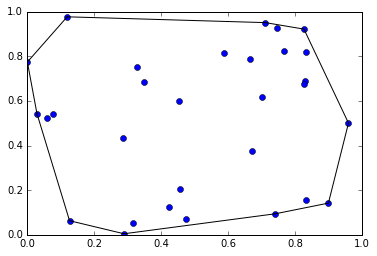

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
   plt.plot(points[simplex,0], points[simplex,1], 'k-')
plt.show()

**Переформулировка задачи.** Пусть $P = (p_1, p_2, ... ,p_n)$ — выпуклый многоугольник, в котором порядок обхода вершин направлен против часовой стрелки, и никакие три последовательные точки не лежат на одной прямой. Найти пару чисел $\langle i$, $j \rangle$, такие, что $d(p_i, p_j)$ максимально.

** Определение 3.** Прямая $L$ называется **опорной прямой** *(англ. line of support)* для многоугольника $P$, если его внутренность лежит по одну сторону от $L$, при этом $L$ проходит хотя бы через одну из вершин $P$.

<img src="Desktop/o.png" style="display: inline"/>

**Теорема 1.** Пусть $L_1$ и $L_2$ — две параллельные опорные прямые фигуры $P$, расстояние между которыми имеет максимальное значение. $A$ и $B$ — граничные точки фигуры $P$, принадлежащие соответственно прямым $L_1$ и $L_2$. Тогда отрезок $AB$ перпендикулярен обеим прямым $L_1$ и $L_2$.

<img src="Desktop/y.png" style="display: inline"/>

*Доказательство.* Докажем от противного.  
Пусть $AB$ не перпендикулярен обеим прямым $L_1$ и $L_2$. Тогда расстояние между прямыми $L_1$ и $L_2$ было бы меньше, чем отрезок $AB$, и тем более меньше, чем расстояние между двумя опорными прямыми $L'_1$ и $L'_2$ фигуры $P$, перпендикулярными к отрезку $AB$, что противоречит условию. Ч.т.д.


**Следствие 1.** Каждая из $L_1$ и $L_2$ содержит единственную граничную точку фигуры $P$.

*Доказательство.* Так как $A$ и $B$ — какие угодно граничные точки фигуры $P$, принадлежащие соответственно прямым $L_1$ и $L_2$, то из перпендикулярности отрезка $AB$ к прямым $L_1$ и $L_2$ следует, что ни одна из прямых $L_1$, $L_2$ не может иметь с фигурой $P$ целый общий отрезок. Ч.т.д.

**Теорема 2.** Диаметр выпуклого многоугольника равен максимальному расстоянию между параллельными опорными прямыми.

<img src="Desktop/p.png" style="display: inline"/>

*Доказательство.* Пусть $P$ — выпуклая фигура, $L_1$ и $L_2$ — параллельные опорные прямые, расстояние между которыми имеет наибольшее возможное значение $d$, $A$ и $B$ — общие точки фигуры $P$ и прямых $L_1$ и $L_2$ соответственно. По предыдущей теореме $AB$ перпендикулярен к прямым $L_1$, $L_2$, следовательно, его длина равна $d$. Докажем, что расстояние между любыми двумя точками фигуры $P$ не преводходит $d$. Действительно, если $C$ и $D$ — какие-либо две точки фигуры $P$, а $L_3$ и $L_4$ — опорные прямые, перпендикулярные к отрезку $CD$, то отрезок $CD$ не превосходит расстояния между прямыми $L_3$ и $L_4$, которое в свою очередь не превосходит $d$. Следовательно, длина $CD$ не может быть больше $d$. Ч.т.д.

** Определение 4.** Точки, через которые можно провести параллельные опорные прямые, будем называть **противолежащими** *(англ. antipodal)*.

Заметим, что параллельные опорные прямые можно провести не через любую пару точек. 

### Алгоритм

Для начала найдем минимальную и максимальную точку среди точек выпуклой оболочки (лексикографически) $A$ и $B$. $A$ и $B$ - противолежащие. Создадим две вертикальных параллельных прямых, проходящих через соответствующие точки – $l_1$, $l_2$. Нарисуем их красными прямыми.

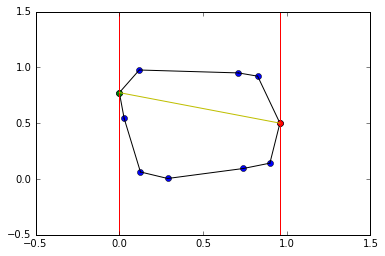

In [5]:
hpoints = points[hull.vertices] #массив точек выпуклой оболочки
n = len(hpoints) #количество точек в выпуклой оболочке
A = 0 #А - самая минимальная точка по координате Х
B = 0 #В - самая максимальная точка по координате Х
for i in range(1, n): #поиск минимальной и максимальной точки по координате Х
    if (hpoints[i][0] < hpoints[A][0]):
        A = i
    if (hpoints[i][0] > hpoints[B][0]):
        B = i
dir = [0, 1]    

best = [A, B] #диаметр множества(на данный момент это лучший из проверенных)

draw(A, B, dir, best)


Будем заворачивать калиперы против часовой стрелки, поэтому условимся, что $l_1$ смотрит вниз, а $l_2$ вверх. Добавим текущие точки, на которых стоят параллельные прямые, в ответ ($⟨A,B⟩$). Нарисуем желтый отрезок $AB$.

In [6]:
def dist(a, b): #квадрат расстояния между точками выпуклой оболочки
    return (hpoints[a][0] - hpoints[b][0])**2 + (hpoints[a][1] - hpoints[b][1])**2;

<img src="Desktop/e.png" style="display: inline"/>

$nextA$ и $nextB$ - следующие против часовой стрелки вершины многоугольника. Сравним угол между $l_1$ и $AnextA$ с углом между $l_2$ и $BnextB$. Для этого нужно выбрать меньший и перейти к следующей точке относительно выбранной, повернув при этом соответствующую прямую на величину меньшего угла, так, чтобы прямая теперь совпадала с ребром.
Заметим, что $l_1$ параллельна $l_2$, значит мы можем перенести вектор $BnextB$ в точку $A$, получив вектор $AnextB$, и сравнивать относительно $l_1$. Но $AnextA$ и $AnextB$ будут по разную сторону относителльно $l_1$. Поэтому если взять вектор $-AnextB$, то можно с помощью знака предиката поворота сравнить углы относительно $l_1$.

<img src="Desktop/t.png" style="display: inline"/>

Будем всегда поддерживать параллельность калиперов (прямых), поэтому вторую прямую тоже мысленно повернем. Получим две новые параллельные прямые $l_3$, $l_4$. 

<img src="Desktop/f.png" style="display: inline"/>

Перейдем в начало процесса. Пусть угол с $BnextB$ оказался больше, тогда сравним dist(A,nextB) с сохранненьным ранее dist(A,B). Запомним лучший. Когда алгоритм придет в начальное положение, на выходе получим искомое расстояние.

In [7]:
def draw(A, B, dir, best):#вспомогательная функция рисования
    plt.plot(hpoints[:,0], hpoints[:,1], 'o')    
    for simplex in hull.simplices:
        plt.plot(points[simplex,0], points[simplex,1], 'k-')
    plt.plot(hpoints[A][0], hpoints[A][1], 'go')
    plt.plot(hpoints[B][0], hpoints[B][1], 'ro')
    
    axes = plt.axis()
    plt.xlim( [axes[0], axes[1]])
    plt.ylim( [axes[2], axes[3]])    
    plt.plot([hpoints[A][0] - dir[0] * 100, hpoints[A][0] + dir[0] * 100], [hpoints[A][1] - dir[1] * 100, hpoints[A][1] + dir[1] * 100], 'r')
    plt.plot([hpoints[B][0] - dir[0] * 100, hpoints[B][0] + dir[0] * 100], [hpoints[B][1] - dir[1] * 100, hpoints[B][1] + dir[1] * 100], 'r')

    plt.plot([hpoints[best[0]][0], hpoints[best[1]][0]], [hpoints[best[0]][1], hpoints[best[1]][1]], 'y')
      
    plt.xlim( [axes[0] - 0.5, axes[1] +0.5])
    plt.ylim( [axes[2] - 0.5, axes[3] +0.5])    
        
    plt.show()

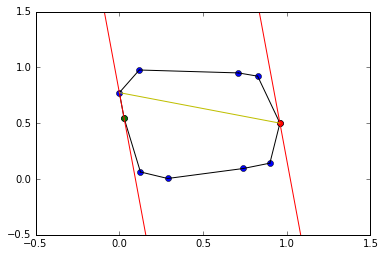

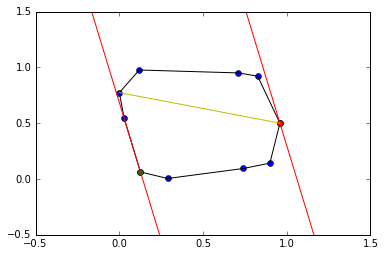

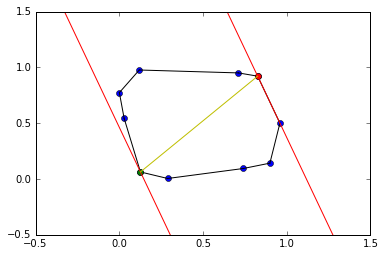

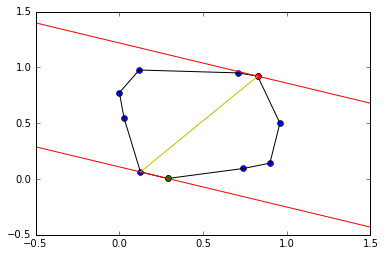

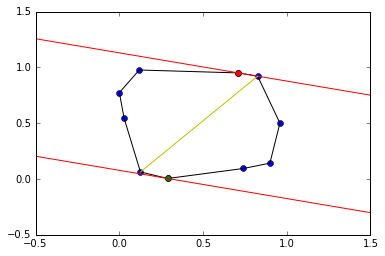

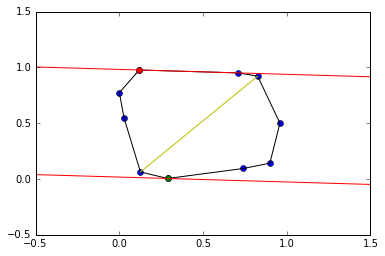

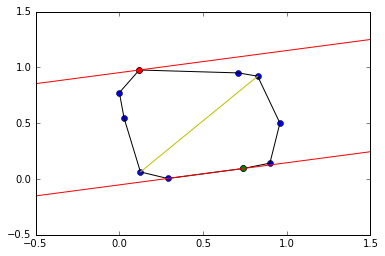

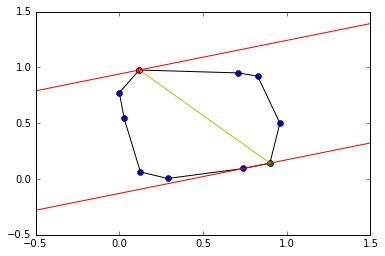

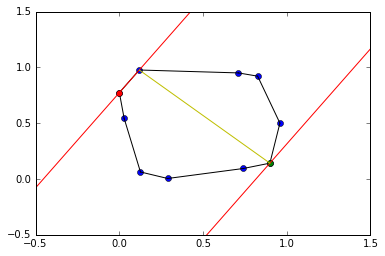

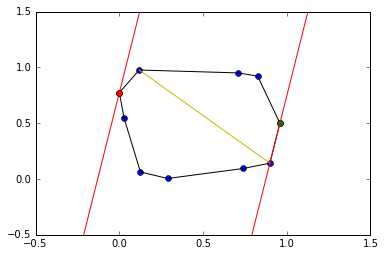

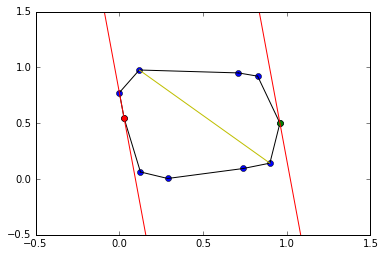

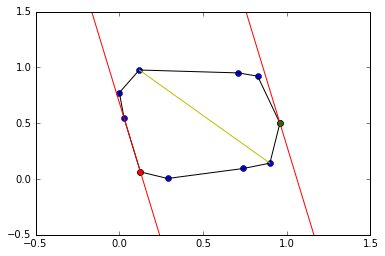

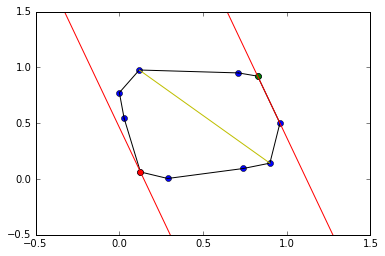

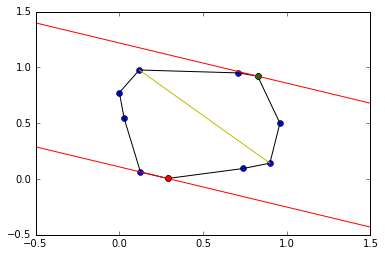

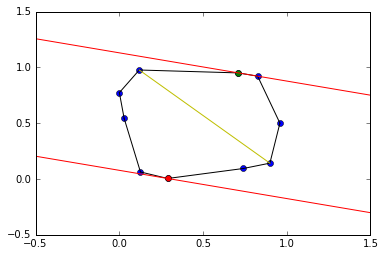

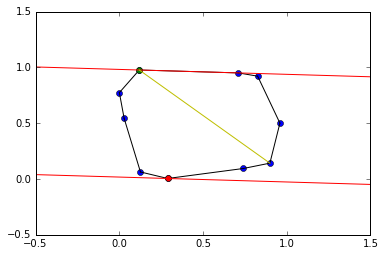

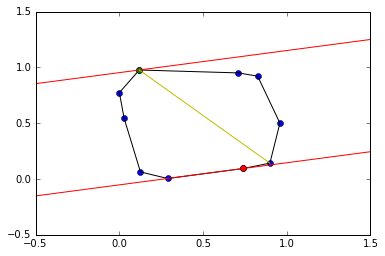

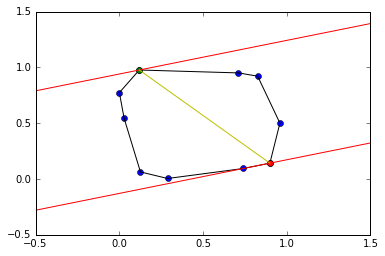

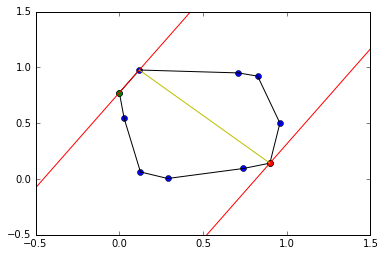

In [8]:
def vecmul(x1, y1, x2, y2):#поиск предиката поворота
    return x1 * y2 - x2 * y1

for i in range(0, n):
    nextA = (A + 1) % n;#следующая вершина после А против часов стрелки
    vA = [hpoints[nextA][0] - hpoints[A][0], hpoints[nextA][1] - hpoints[A][1]]
    #Расстояние AnextA
    nextB = (B + 1) % n;#следующая вершина после В против часов стрелки
    vB = [hpoints[nextB][0] - hpoints[B][0], hpoints[nextB][1] - hpoints[B][1]]
    #Расстояние BnextB
    while (vecmul(vA[0], vA[1], -vB[0], -vB[1]) < 0):#если отрицательный, то переходим к nextB
        dir = vB
        B = nextB
        if (dist(A, B) > dist(best[0], best[1])):#изменение уже найденного диаметра
            best = [A, B]
        draw(A, B, dir, best)
        nextB = (B + 1) % n;
        vB = [hpoints[nextB][0] - hpoints[B][0], hpoints[nextB][1] - hpoints[B][1]]
    dir = vA #иначе переходим к nextA
    A = nextA
    if (dist(A, B) > dist(best[0], best[1])):#изменение уже найденного диаметра
        best = [A, B]
    draw(A, B, dir, best)

До этого момента мы хранили dist() - как квадрат расстояния. Давайте возьмем корень и получим искомый диаметр.

In [9]:
import math
print(math.sqrt(dist(best[0],best[1])))

1.1425890187459364


### Корректность алгоритма

*Доказательство.* Докажем от противного.  
Пусть среди всех пар точек, формирующих ребра, нет нужной. Отметим, что метод выдает все ребра, для которых верно, что сущетствует пара параллельных прямых, не пересекающих многоугольник, проходящих через эти точки. Очевидно, что если для двух точек такие прямые не построить, то и диаметр на них лежать не может – легко показать, что взяв соседнюю, мы увеличим расстояние между ними (следует из непараллельности, надо аккуратно по- смотреть углы).
Отсюда диаметр лежит в классе пар точек, на которых прямые строятся. Поскольку алгоритм просматривает все такие (несложно показать), то диаметр будет лежать среди ребер ответа. Ч.т.д.

### Асимптотика

Представленный выше алгоритм генерирует все пары противолежащих точек в многоугольнике P, состоящем из N вершин, за время O(N).

*Доказательство.*  Мы хранили указатели на противолежащие вершины, и на каждой итерации алгоритма увеличивали либо один из данных указателей, либо сразу оба (когда обе прямые проходяли через сторону многоугольника), и заканчивали работу, когда опорные прямые сделали полный круг. Таким образом, каждая из вершин була посещена каждой из прямых не более двух раз. Ч.т.д.

### В каких задачах можно ещё использовать метод вращающихся калиперов для решения?

1. Поиск расстояния между двумя многоугольниками. Абсолютно аналогично проводим алгоритм для поиска диаметра (в инициализации у более левого/нижнего берем минимальную точку, а у другого максимальную), но добавляем в список ответа пару ⟨доминирующее ребро, вершина⟩.  
2. Поиск двух общих касательных у выпуклых многоугольников. В инициализации у обоих полигонов берем минимальные точки, калиперы сонаправлены. В момент, когда калиперы меняются местами (один становится выше другого), мы проходим точку касания.
3. Поиск суммы Минковского двух объектов.